In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:

file= 'training_data_5.csv'

training_data = pd.read_csv(file)
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]


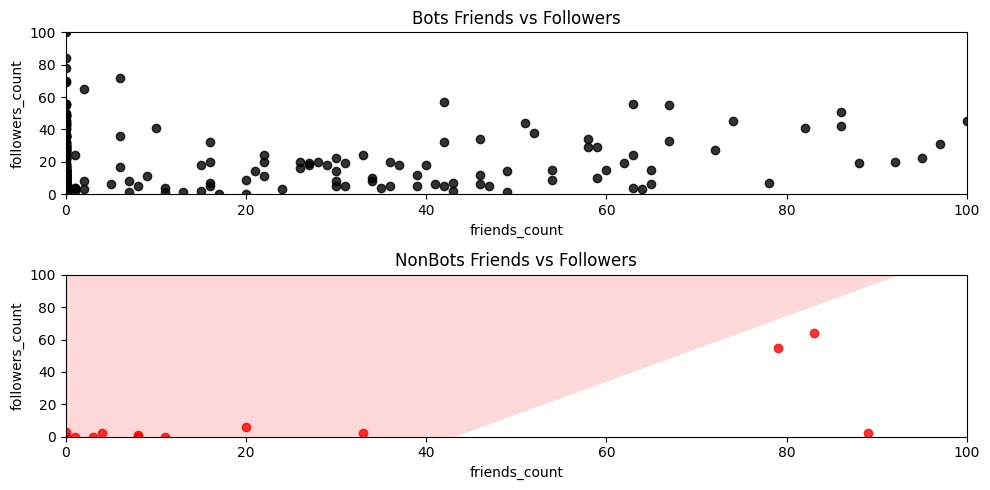

In [7]:
bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(x=bots.friends_count, y=bots.followers_count, color='black', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(x=nonbots.friends_count, y=nonbots.followers_count, color='red', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [20]:
filepath = '/home/damion/Desktop/kaggle_data/'
file= open('training_data_5.csv', mode='r', encoding='utf-8', errors='ignore')

training_data = pd.read_csv(file)

bag_of_words_bot = r'bot|b0t|cannabis|crypto|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            #na =false sets nan values to false

training_data['screen_name'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)

training_data['name'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)

0        _notmichelle
1           jesseayye
2        MrBrianLloyd
3          andhesonit
4             KLitzau
            ...      
652          1209hoha
653      SallesWander
654         tony11642
655    HeinzMarketing
656     estefania1318
Name: screen_name, Length: 657, dtype: object
0      False
1      False
2      False
3      False
4      False
       ...  
652    False
653    False
654    False
655    False
656    False
Name: screen_name, Length: 657, dtype: bool


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

features = ['screen_name', 'name', 'description', 'status', 'verified', 'followers_count', 'friends_count', 'statuses_count',  'bot']
X = training_data[features].iloc[:,:-1] #iloc gives us row,all column elements except the last one
y = training_data[features].iloc[:,-1] # iloc gives us row,only the last column element called bot

